In [3]:
import requests
from bs4 import BeautifulSoup
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt

In [4]:
URL = 'https://api.covid19india.org/data.json' 

#headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0'}

#page = requests.get(URL,headers=headers)
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
new_soup = ast.literal_eval(soup.get_text())  # to get dictionary

In [5]:
cts = new_soup['cases_time_series'] # cst is a list of dictionary
sw = new_soup['statewise']
tested = new_soup['tested']

In [6]:
daily_confirmed = []
daily_deceased = []
daily_recovered = []
total_confirmed = []
total_deceased = []
total_recovered = []
date = []

In [7]:
i = 0
while i < len(cts) :
    daily_confirmed.append(int(cts[i]['dailyconfirmed']))
    daily_deceased.append(int(cts[i]['dailydeceased']))
    daily_recovered.append(int(cts[i]['dailyrecovered']))
    total_confirmed.append(int(cts[i]['totalconfirmed']))
    total_deceased.append(int(cts[i]['totaldeceased']))
    total_recovered.append(int(cts[i]['totalrecovered']))
    date.append(cts[i]['date'])
    i += 1

In [8]:
start_date = dt.datetime(2020, 1, 30).date()
end_date = dt.datetime.now().date()
days = mdates.drange(start_date, end_date, dt.timedelta(days = 1))

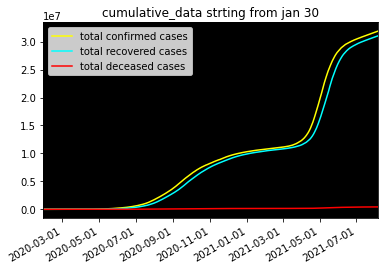

In [12]:
plt.figure(1)
ax = plt.axes()
ax.set_facecolor('black')
plt.title('cumulative_data strting from jan 30')
plt.plot( days, total_confirmed, color = 'yellow',label = 'total confirmed cases' )
plt.plot( days, total_recovered, color = 'cyan', label = 'total recovered cases' )
plt.plot( days, total_deceased, color = 'red',label = 'total deceased cases' )
plt.legend()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xlim(start_date, end_date)
plt.gcf().autofmt_xdate()
plt.show()

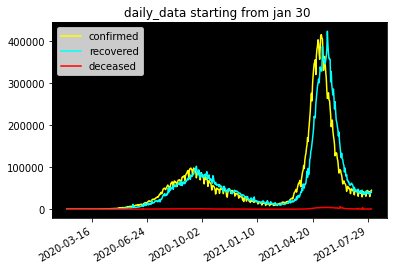

In [13]:
plt.figure(2)
ax = plt.axes()
ax.set_facecolor('black')
plt.title('daily_data starting from jan 30 ')
plt.plot(days, daily_confirmed, color = 'yellow', label = 'confirmed')
plt.plot(days, daily_recovered, color = 'cyan', label = 'recovered')
plt.plot(days, daily_deceased, color = 'red', label = 'deceased')
plt.legend()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()